
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

## Segmentación 

### Umbralización 
Umbralizar una imagen es el método más simple de segmentación. Es una operación no-lineal que convierte una imagen de niveles de gris en una imagen binaria, en la que los dos niveles estan asociados a si el pixel contiene un valor de gris mayor o menor a un umbral. 
En OpenCV, se usa la función cv2.threshold(src, thresh, maxval, type[, dst]). Los parámetros son:
* src -la imagen de entrada de un solo canal. 
* thresh - umbral para establecer la salida como imagen binaria.
* maxval - representa el valor que se le da al pixel de la imagen de salida si es mayor que  el umbral. 
* type -  tipo de umbralización. Las posibles son:
    cv2.THRESH_BINARY
    cv2.THRESH_BINARY_INV
    cv2.THRESH_TRUNC
    cv2.THRESH_TOZERO
    cv2.THRESH_TOZERO_INV
    En la imagen de abajo se muestra el resultado de estos tipos de umbralización.
* dst - salida del mismo tamaño y tipo como la imagen de entrada.
<img src="thrshold_params.png">

Veamos un ejemplo



(<matplotlib.axes._subplots.AxesSubplot at 0x264fd388dc8>,
 Text(0.5, 1.0, 'TOZERO_INV 128.0'))

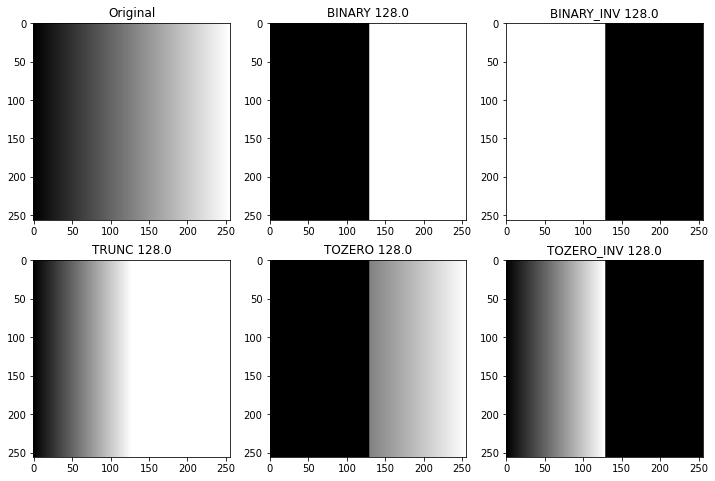

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=np.zeros((256,256),dtype='uint8')
for i in range(256):
    image[:,i]=i
    

th1,i1=cv2.threshold(image, 128, 255, cv2.THRESH_BINARY )
th2,i2=cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV )
#En la truncada respeta el nivel hasta 128 y luego lo trunca a 255
th3,i3=cv2.threshold(image, 128, 255, cv2.THRESH_TRUNC)
#Si esta por debajo lo pone a 0 y sino lo deja igual
th4,i4= cv2.threshold(image, 128, 255,cv2.THRESH_TOZERO )
th5,i5= cv2.threshold(image, 128, 255,cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(image,'gray'),plt.title("Original")
plt.subplot(232),plt.imshow(i1,'gray'),plt.title("BINARY"+" "+str(th1))
plt.subplot(233),plt.imshow(i2,'gray'),plt.title("BINARY_INV"+" "+str(th2))
plt.subplot(234),plt.imshow(i3,'gray'),plt.title("TRUNC"+" "+str(th3))
plt.subplot(235),plt.imshow(i4,'gray'),plt.title("TOZERO"+" "+str(th4))
plt.subplot(236),plt.imshow(i5,'gray'),plt.title("TOZERO_INV"+" "+str(th5))

#### Umbralización Adaptativa
En umbralización simple, se usa un umbral global para toda la imagen. En el caso de tener condiciones de luminosidad diferentes en distintas áreas la umbralización global no funcionará bien. La umbralización adaptativa es el método en el que el umbral se calcula para regiones más pequeñas. Asi obtenemos por cada región un umbral y se umbraliza la región con ese umbral local. Para aplicar este tipo de umbralización OpenCV cuenta con la función cv2.adaptiveThreshold. Asi la cabecera y parámetros son:
 cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)
* source: Imagen de entrada 8-bit un único canal.
* maxVal: Mínimo valor que será asignado a un pixel
* adaptiveMethod: Método para obtener el umbral,  que pued ser :
    * cv2.ADAPTIVE_THRESH_MEAN_C: el valor del umbral es igual al valor medio del area menos un valor constante. 
    * cv2.ADAPTIVE_THRESH_GAUSSIAN_C: el valor del umbral es igual a la suma ponderada por una gausiana en el bloque  menos una constante.
* thresholdType: Tipo de umbralización (igual que la umbralización global).
* blockSize:  Tamaño del bloque para aplicar la umbralización. Por defecto es 3.
* constant: Un valor constate que se resta de la media o suma ponderada. 



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img= cv2.imread('bp1.jpg');
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
i1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
  
i2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

th1,iglobal=cv2.threshold(img, 128, 255, cv2.THRESH_BINARY )
cv2.imshow('Original', img)
cv2.imshow('Th Global', iglobal)
cv2.imshow('Adaptativa Mean', i1)
cv2.imshow('Adaptativa Gaussian', i2)
  
     
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 



#plt.figure(figsize=(15,15))
#plt.subplot(221)
#plt.imshow(img,'gray'),plt.title("Original")
#plt.subplot(222),plt.imshow(iglobal,'gray'),plt.title("BINARY GLOBAL")
#plt.subplot(223),plt.imshow(i1,'gray'),plt.title("Adaptativa Media")
#plt.subplot(224),plt.imshow(i2,'gray'),plt.title("Adaptativa Gausiana ")

### Transformada Hough
Si podemos representar una forma mediante una ecuación matemática la transformada de Hough puede detectar esa forma en una imagen. La forma puede ser detectada aunque esté incompleta, o un poco distorsionada.
La forma geométrica más básica es una línea. La ecuación parámetrica de una línea es $y=a*x+b$ o en forma polar $\rho = x*cos \theta+ y*sin\theta$. Siendo $\rho$ la distancia de la línea al origen y $\theta$ el ángulo formado por la línea perpendicular y el eje horizontal, medido en el sentido contrario a las agujas del reloj. 
Esto se muestra en la siguiente imagen:
<img src="houghlines1.svg">
Así si la línea esta bajo el origen, tendrá un $\rho$ positivo y un ángulo menor que 180 grados. Si la línea esta por encima del origne, tomará un ángulo menor que 180 y $\rho será negativo. Una línea vertical tendrá cero grados y las lineas horizontales tiene 90 grados.

En OpenCV tenemos la funcion **cv2.HoughLines()** para obtener las lineas de la imagen. Previamente se debe obtener fronteras. La función **cv2.HoughLines()** devuelve un vector de pares $(\rho,\theta)$. $\rho$ se mide en pixeles y $\theta$ en radianes. La imagen de entrada debe ser binaria. Lo mejor para ello es aplicar sobre la imagen de entrada canny y umbralizar. El segundo y tercer parámetro de la función es la agudeza para $\rho$ y $\theta$. Y el cuarto parámetros es un umbra de voto, que determina el minimo número de votos que deberia lograr una pareja $(\rho,\theta)$ para ser considerada como una linea. Hay que tener en mente que el número de votos de una par dependerá del numero de puntos de arista en esa linea. Por lo tanto se puede interpretar como la longitud mínima que de la línea.  
Veamos un ejemplo

(<matplotlib.image.AxesImage at 0x264fd73ed48>,
 Text(0.5, 1.0, 'Original+Lineas'))

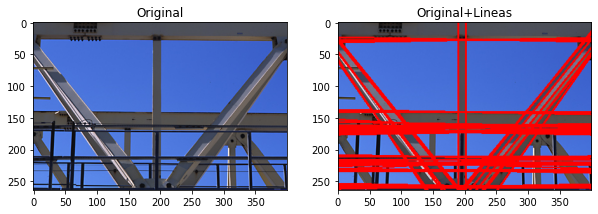

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('grua_porti.png')
img_copy=img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)

#Aplicamos sobre las aristas la transformada de Hough, np.pi es la precision de los cubos 
#de grado en grado, el ultimo valor es cuando el acumulador alcanza el maximo para ser una linea
lines = cv2.HoughLines(edges,1,np.pi/180,120)

#se recorren todas y se pintan en la imagen.
for l in lines:
    for rho,theta in l:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)),plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title("Original+Lineas")


#### Transformada Hough para detectar círculos
Un círculo se representa matemáticamente como $(x-x_{center})^2 + (y - y_{center})^2 = r^2$ 
siendo $(x_{center}, y_{center})$ el centro del círculo y $r$ el radio del círculo. 
Por lo tanto tenemos 3 parámetros, con lo que construir el acumulador de la transformada de Hough. 
OpenCV tiene definida la funcion cv2.HoughCircles() para obtener los círculos en una imagen. Los parámetros de esta función son:
* image: imagen de 8-bti con un solo canal. 
* method: Define el método para detectar circulos en una imagen. Ahora mismo el metodo implementado es cv2.HOUGH_GRADIENT. Este método se corresponde a la publicación:
A  COMPARATIVE  STUDY  OF  HOUGH  TRANSFORMMETHODS  FOR  CIRCLE  FINDINGH.K.  Yuen,  J.  Princen,  J.  Illingworth  and  J.  Kittler.
* dp:  Es el inversa de la razón  de la resolución del acumulador y la resolución de la imagen. Si ponemos un valor grande eso significa que el acumulador tiene menor detalle (los bin son mas grandes). 
* minDist: Minima distancia entre los centros de los circulos a detectar. Si este valor es pequeño entonces se puede detectar múltiples circulos en el mismo entorno (detectando incluso falso círculos). Si es muy grande puede que circulos reales no se detecten.
* param1: Valor del gradientes usado para dirigir la detección de aristas en el método de Yuen. 

* param2: Valor de umbral del acumulador para el metodo cv2.HOUGH_GRADIENT. Este valor si es más pequeño, mas círculos seran detectados. 
* minRadius:  Minimo radio de los círculos (en pixeles).
* maxRadius:  Máximo radio de los círculos (en pixeles).

Veamos un ejemplo.

(<matplotlib.image.AxesImage at 0x264fdd592c8>,
 Text(0.5, 1.0, 'Original+Circulos'))

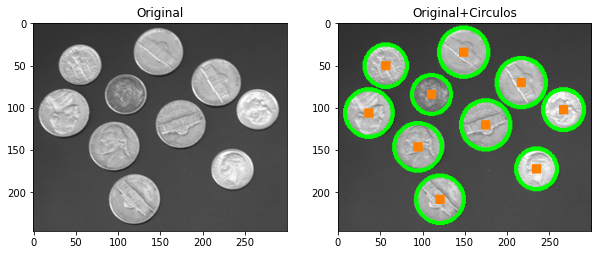

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('coins.png')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 52, param1=20, param2=42, minRadius=20, maxRadius=35)



# Aseguramos que hemos encontrado al menos un circulo
if circles is not None:
    
        # convertivmos (x,y) y radio a enteros
        c = np.round(circles[0, :]).astype("int")
        #iteramos por todos los circulos
        for (x, y, r) in c:
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)),plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB)),plt.title("Original+Circulos")



### Algoritmo  Watershed
La filosfia del algoritmo watershed es que una imagen puede interpretarse como una superficie topográfica, es decir con relieves. Los relieves se forman por los cambios de intensidades en los niveles de gris de una imagen. De esta forma esos cambios en los niveles de gris forman valles (bajas intensidades) y  picos (altas intensidades). Entonces la idea del algoritmo es ir rellenado con agua (de diferentes colores) los valles (los mínimos locales). Dependiendo de los picos más proximos a los valles tardarán mas o menos en rellenarse esos valles. LLegará un punto que se rellenen dos valles separados por un mismo pico y entonces las aguas de diferente color se mezclen. En este punto se establece una frontera. Este proceso se continua hasta que todos los picos estén debajo de agua. Las fronteras que hemos establecido para que las aguas no se mezclen nos da la segmentación resultante. 
Esta aproximación tiene que tratar con el ruido presente en la imagen o en caso contrario puede ocurrir una sobresegmentación. 
OpenCV implementa watershed en el que el usuario especifica cuales son los puntos valle que deben ser inundados y cuales no. 
En el código de abajo vamos a usar la imagen de las monedas. En primer lugar vamos a dar una primera aproximación a los objetos en la imagen usando una umbralización. 

(<matplotlib.axes._subplots.AxesSubplot at 0x264ffa23088>,
 Text(0.5, 1.0, 'Umbralizada'))

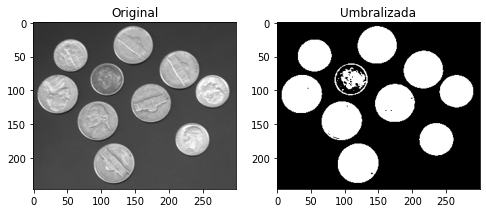

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(thresh,'gray'),plt.title('Umbralizada')

Nos podemos encontrar con dos situaciones:
<ol>
    <li> La imagen umbralizada presenta agujeros. Lo conveniente sería aplicar a esta imagen una operación de clausura (dilatación +erosion)
    <li> La imagen umbralizada presente pequeños puntos de ruido. Lo conveniente seria aplicar a la imagen una operación de apertura ( erosión+dilatación)
</ol>    
En nuestro caso tenemos agujeros en algunas de las monedas, asi que vamos a aplicar una operación de clausura. 

Con esta imagen podemos asegurar que dos regiones proximas al centro de un objeto estan en primer plano y que regiones lejos del centro de un objeto estan en el fondo. Los pixeles que estan en el limite del objeto es donde puede ocurrir duda para etiquetar como fondo u objeto. 


(<matplotlib.axes._subplots.AxesSubplot at 0x264ff88f748>,
 Text(0.5, 1.0, 'Backgroun Seguro'))

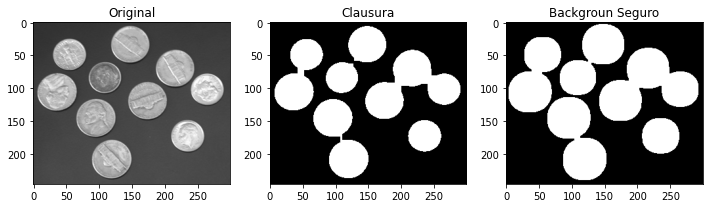

In [7]:
# Rellenamos los agujeros
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 4)

# Area de fondo segura
sure_bg = cv2.dilate(close,kernel,iterations=3)

opening = cv2.erode(close,kernel, iterations = 7)
plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.subplot(132),plt.imshow(close,'gray'),plt.title('Clausura')
plt.subplot(133),plt.imshow(sure_bg,'gray'),plt.title('Backgroun Seguro')

A continuación vamos a obtener la distancia de un pixel al pixel con valor 0 (fondo) más próximo. Para ello vamos a usar la función dst	=	cv.distanceTransform()


(<matplotlib.axes._subplots.AxesSubplot at 0x264fd5387c8>,
 Text(0.5, 1.0, 'Indecisas'))

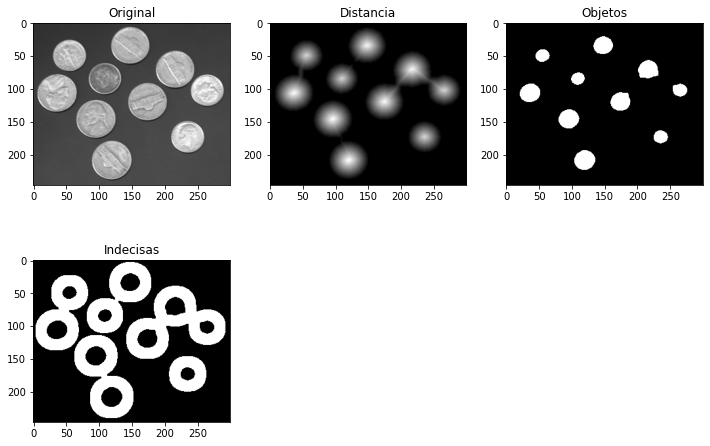

In [9]:
#calculamos la minimia distancia a un pixel del fondo 
dist_transform = cv2.distanceTransform(close,cv2.DIST_L2,5)
# Los objetos 
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
#Las regiones indecisas 
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure(figsize=(12,8))
plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.subplot(232),plt.imshow(dist_transform,'gray'),plt.title('Distancia')
plt.subplot(233),plt.imshow(sure_fg,'gray'),plt.title('Objetos')
plt.subplot(234),plt.imshow(unknown,'gray'),plt.title('Indecisas')

Ahora conocemos que regiones corresponden a monedas y cuales a fondo. Vamos a crear una nueva imagen que etiqueta la información de los objetos monedas
OpenCV tiene la función cv.connectedComponents() para encontrar pixeles conectados.
Esta función etiqueta el fondo con valor 0 y el resto de objetos etiqueta empezando por 1.
Watershed considera la región desconocida (imagen arriba Indecisas) con etiqueta 0. Así que el fondo lo etiquetaremos con 1 y el resto de objetos con 2 en adelante. Este se consigue haciendo en el código de abajo markers=markers+1.



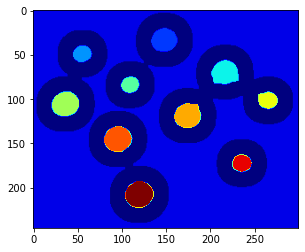

In [10]:
# Etiquetamos las monedas y el fondo
ret, markers = cv2.connectedComponents(sure_fg)
#Añadirmos una nueva etiqueta para las regiones que no sabemos
#si será objeto o fondo.

markers = markers+1
# Marcamos la zona desconocida con 0
markers[unknown==255] = 0
plt.imshow(markers,cmap='jet')

La region azul oscura muesra la regiones indecisas (desconcidas). Las monedas son coloreadas con diferentes valores. 
Una vez que hemos marcado la imagen, aplicamos el algoritmos watershed. La imagen "markers" es modificada, de forma que las fronteras son marcadas con -1.


(<matplotlib.axes._subplots.AxesSubplot at 0x264ffd80708>,
 Text(0.5, 1.0, 'Segmentacion'))

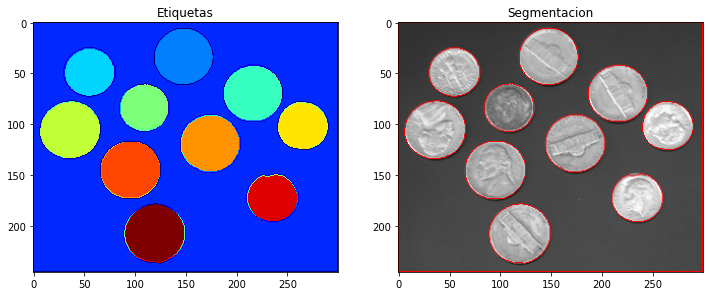

In [11]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(markers,cmap='jet'),plt.title('Etiquetas')
plt.subplot(122),plt.imshow(img,'gray'),plt.title('Segmentacion')